In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("Data_Pathrise.csv")
df

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2539,2540,Withdrawn (Failed),Design,JUN18A,457.0,0,Contractor,Master's Degree,6 months to a year,Technical interviewing,5+ years,Citizen,4.0,15,Male,Non-Hispanic White or Euro-American
2540,2541,Withdrawn (Failed),Data,JAN19B,488.0,0,NaN,Master's Degree,3-5 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,1.0,7,Male,Non-Hispanic White or Euro-American
2541,2542,Active,SWE,SEP18C,NaN,0,Contractor,Bachelor's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,1.0,30,Female,Non-Hispanic White or Euro-American
2542,2543,Active,SWE,MAY18A,NaN,0,NaN,Master's Degree,Less than one month,Technical interviewing,1-2 years,Citizen,2.0,10,Male,Decline to Self Identify


In [9]:
df["highest_level_of_education"].unique()

array(["Bachelor's Degree", 'Some College, No Degree', "Master's Degree",
       nan, 'Doctorate or Professional Degree', 'High School Graduate',
       'GED or equivalent', 'Some High School'], dtype=object)

Text(0.5, 0, 'Variable Name')

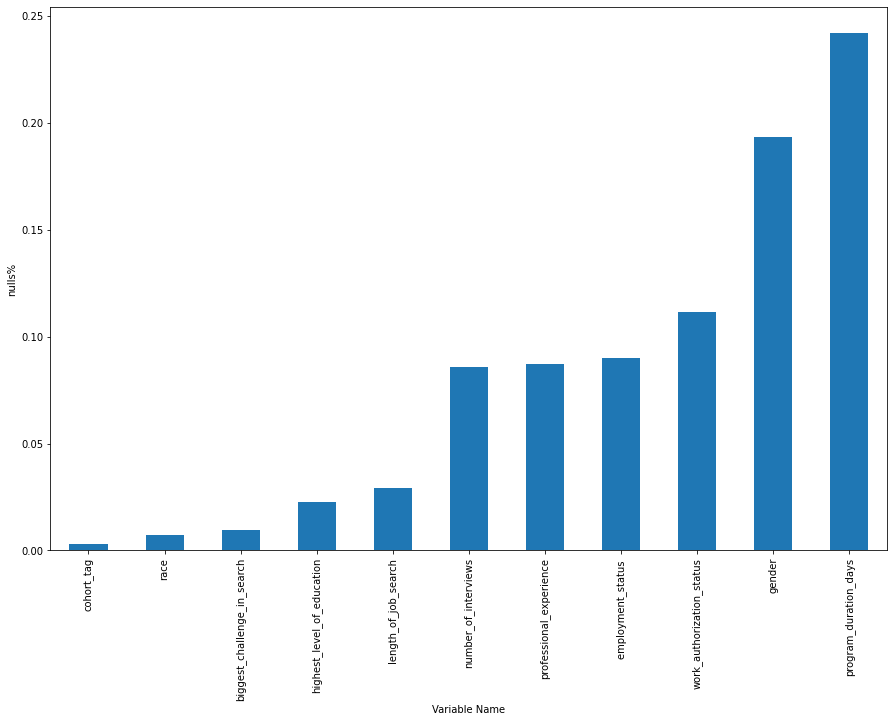

In [10]:
nulls = df.isnull().sum()
nulls = nulls[nulls > 0]
nulls.sort_values(inplace=True)
nulls = (nulls / (len(df)))
ax = nulls.plot.bar(figsize = (15,10))
ax.set_ylabel("nulls%")
ax.set_xlabel('Variable Name')

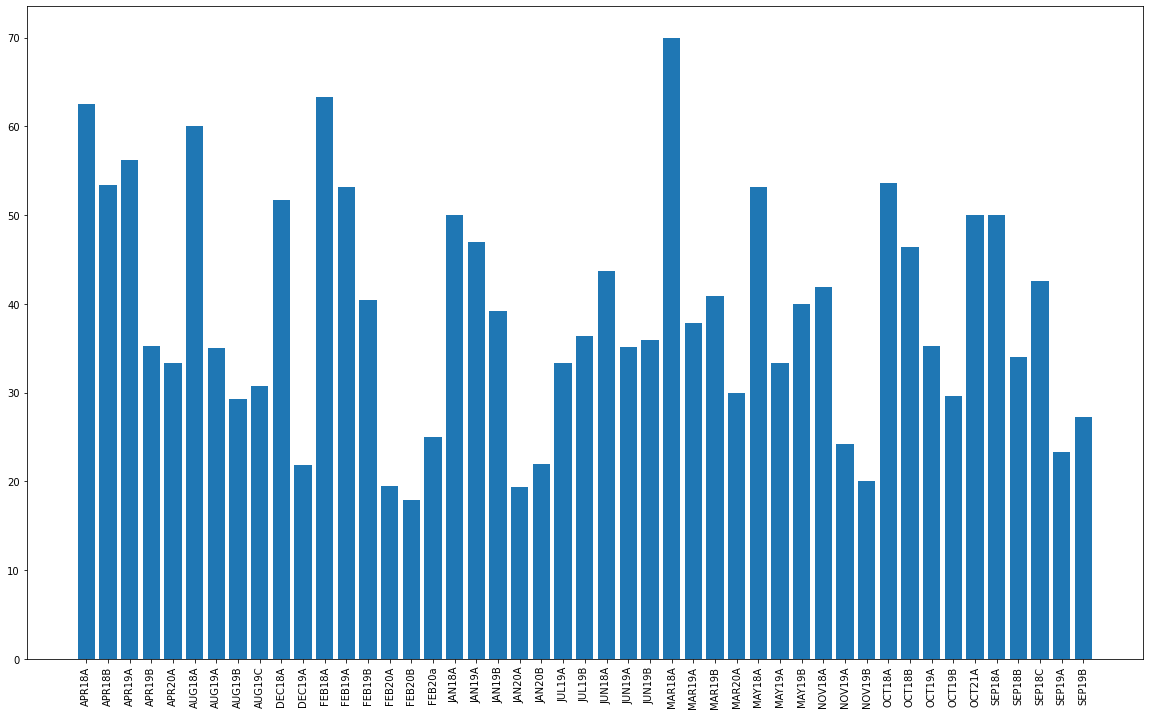

In [11]:
cohorts = df["cohort_tag"].unique()
cohorts = cohorts[0 : len(cohorts) - 1]
cohorts.sort()
chdic  = {}
success = {}
for i in cohorts:
    chdic[i] = df[df["cohort_tag"] == i]
    if(len(chdic[i]) != 0):
        placed = chdic[i][chdic[i]["placed"] == 1]
        success[i] = (len(placed) / len(chdic[i]))*100
        #print(i, "  ", success[i], end="\t")
plt.figure(figsize=(20,12))
plt.bar(range(len(success)), list(success.values()), align='center',)
plt.xticks(range(len(success)), list(success.keys()), rotation = 90)
#plt.figure(figsize = (30,30))

plt.show()    

In [12]:
df_dummies = pd.get_dummies(data=df,columns=['pathrise_status','primary_track','cohort_tag','highest_level_of_education','length_of_job_search',
'biggest_challenge_in_search','professional_experience','work_authorization_status','gender','race', 'employment_status '])